In [1]:
# using python 3 to better handle unicode emojis
import re
import emoji
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

%matplotlib inline

In [2]:
# Try emoji extraction function in python 3:
def extract_emojis(s):
    return ''.join(c for c in str(s) if c in emoji.UNICODE_EMOJI)

In [3]:
# Load data
age_profiles = pd.read_json('assignment_package/age_profiles.json')
ages_train = pd.read_csv('assignment_package/ages_train.csv')

In [4]:
# Create a new age_profiles dataframe that extracts info from "status" column:
age_profiles_new = pd.concat([age_profiles, 
                              pd.DataFrame(age_profiles['status'].apply(pd.Series) \
                                           .rename(columns = lambda x: 'status_' + str(x)))], axis=1)

//anaconda/envs/capstone/lib/python3.6/site-packages/pandas/core/indexes/api.py:43: RuntimeWarning: '>' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  union = _union_indexes(indexes)
//anaconda/envs/capstone/lib/python3.6/site-packages/pandas/core/indexes/api.py:77: RuntimeWarning: '>' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


In [5]:
# Take a look at the new dataframe
# age_profiles_new.head()

In [6]:
# Create a new column 'status_emoji' that only has emojis:
age_profiles_new['status_emoji'] = age_profiles_new['status_text'].map(lambda x: extract_emojis(x))

In [7]:
# Create a new column as emoji count in each profile status text:
age_profiles_new['emoji_cnt'] = age_profiles_new['status_emoji'].map(lambda x: len(x))

# Join ages_train with age_profiles to get user age:


In [8]:
ages_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711 entries, 0 to 1710
Data columns (total 2 columns):
ID     1711 non-null int64
Age    1711 non-null int64
dtypes: int64(2)
memory usage: 26.8 KB


In [9]:
# Remove outliers
ages_new = ages_train[ages_train['Age']<80]

In [10]:
# Create a new column as age_decade:
bins = [15,25,35,45,55,65,120]
group_names = ['16-25','26-35','36-45','46-55','56-65','>65']
ages_new['age_decade'] = pd.cut(ages_new['Age'], bins, labels=group_names)

//anaconda/envs/capstone/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
age_profiles_new.set_index('id', inplace=True)

In [12]:
ages_new.set_index('ID', inplace=True)

In [13]:
age_joined = age_profiles_new.join(ages_new, how='inner')

In [14]:
# Take a look at data
age_joined.head()

,contributors_enabled,created_at,default_profile,default_profile_image,description,entities,favourites_count,follow_request_sent,followers_count,following,friends_count,geo_enabled,id_str,is_translation_enabled,is_translator,lang,listed_count,location,name,notifications,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_banner_url,profile_image_url,profile_image_url_https,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,protected,screen_name,status,statuses_count,time_zone,url,utc_offset,verified,status_contributors,status_coordinates,status_created_at,status_entities,status_favorite_count,status_favorited,status_geo,status_id,status_id_str,status_in_reply_to_screen_name,status_in_reply_to_status_id,status_in_reply_to_status_id_str,status_in_reply_to_user_id,status_in_reply_to_user_id_str,status_lang,status_place,status_possibly_sensitive,status_retweet_count,status_retweeted,status_retweeted_status,status_source,status_text,status_truncated,status_0,status_emoji,emoji_cnt,Age,age_decade
612815277,False,2012-06-19 17:54:58,False,False,You'll never find another one like me.,{'description': {'urls': []}},7931,False,274,False,264,True,612815277,False,False,en,1,,Greggy,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,https://pbs.twimg.com/profile_banners/61281527...,http://pbs.twimg.com/profile_images/4776662828...,https://pbs.twimg.com/profile_images/477666282...,009999,EEEEEE,EFEFEF,333333,True,False,agregtoremember,"{'retweeted_status': {'retweet_count': 452, 'c...",12230,Atlantic Time (Canada),None,-10800.0,False,NaN,None,Fri Sep 26 16:49:37 +0000 2014,"{'urls': [], 'user_mentions': [{'id': 15919560...",0.0,False,None,5.155437e+17,515543724785684480,None,NaN,None,NaN,None,en,None,NaN,452.0,False,"{'retweet_count': 452, 'created_at': 'Fri Sep ...","<a href=""http://twitter.com/download/android"" ...",RT @DogeTheDog: Wow\n So friday\n ...,False,NaN,,0,21,16-25
490791079,False,2012-02-12 22:36:17,False,False,"If you like me, i probably like you more. {IG:...",{'description': {'urls': []}},1141,False,481,False,527,True,490791079,False,False,en,1,9⃣3⃣7⃣,Guff✌️,False,1A1B1F,http://abs.twimg.com/images/themes/theme9/bg.gif,https://abs.twimg.com/images/themes/theme9/bg.gif,False,https://pbs.twimg.com/profile_banners/49079107...,http://pbs.twimg.com/profile_images/5097227545...,https://pbs.twimg.com/profile_images/509722754...,2FC2EF,181A1E,252429,666666,True,False,C_Guffieee,"{'retweet_count': 0, 'created_at': 'Fri Sep 26...",14680,Hawaii,None,-36000.0,False,NaN,None,Fri Sep 26 17:42:07 +0000 2014,"{'urls': [], 'user_mentions': [], 'symbols': [...",0.0,False,None,5.155569e+17,515556938512609280,None,NaN,None,NaN,None,en,None,NaN,0.0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Damn I gotta wait to next week to get the IPho...,False,NaN,😒,1,18,16-25
264416315,False,2011-03-11 21:44:56,False,False,Success doesn’t come to you…you go to it.,{'description': {'urls': []}},174,False,878,False,953,False,264416315,False,False,en,2,Wonderland,Starqueria.⚓,False,FCEBB6,http://pbs.twimg.com/profile_background_images...,https://pbs.twimg.com/profile_background_image...,True,https://pbs.twimg.com/profile_banners/26441631...,http://pbs.twimg.com/profile_images/5127311352...,https://pbs.twimg.com/profile_images/512731135...,CE7834,F0A830,78C0A8,5E412F,True,False,_Starqueria,"{'retweeted_status': {'retweet_count': 2614, '...",22857,Hawaii,None,-36000.0,False,NaN,None,Fri Sep 26 02:57:32 +0000 2014,"{'urls': [], 'media': [{'media_url': 'http://p...",0.0,False,None,5.153343e+17,515334328113307649,None,NaN,None,NaN,None,en,None,False,2614.0,False,"{'retweet_count': 2614, 'entities': {'urls': [...","<a href=""http://twitter.com/download/android"" ...",RT @ImNeverChillin: How your girl look at you ...,False,NaN,,0,18,16-25
9751

## **Which   age   group   uses   the   most   emojis   in   their   profile   status?

**Define 'most emojis'** as total number of emojis used in profile status.

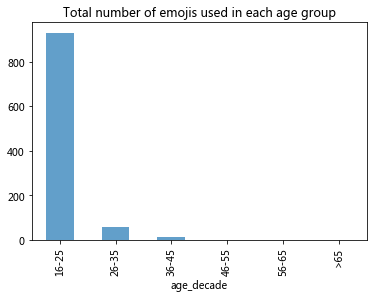

In [15]:
# Absolute number of emojis: 
age_joined.groupby(['age_decade'])['emoji_cnt'].sum().plot(kind='bar', alpha=.7)
plt.title('Total number of emojis used in each age group')

**How about proportion?** Which age groups has the highest proportion of users that are using emojis in profile status?

In [16]:
# Proportion of using emojis:
age_joined.groupby(['age_decade'])['emoji_cnt'].sum() / age_joined.groupby(['age_decade'])['status_text'].count()

age_decade
16-25    0.633697
26-35    0.411765
36-45    0.361111
46-55    0.000000
56-65    0.200000
>65      0.000000
dtype: float64

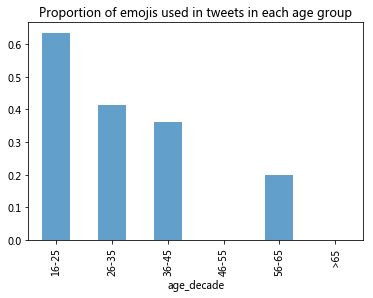

In [17]:
(age_joined.groupby(['age_decade'])['emoji_cnt'].sum() / age_joined.groupby(['age_decade'])['status_text'].count()).plot(kind='bar', alpha=.7)
plt.title('Proportion of emojis used in tweets in each age group')

## Which is the most common emoji?

Define "most common emoji" as the emoji used for the largest number of times.

In [18]:
# Stack all status_emoji together into one list, find the most common one:
all_emojis_lst = list(filter(None, age_profiles_new.status_emoji.tolist()))

In [19]:
# Get a string of all emojis:
all_emojis = ''.join(x for x in all_emojis_lst)

In [20]:
Counter(all_emojis).most_common(5)

[('😂', 164), ('😍', 63), ('😩', 53), ('😭', 50), ('🎉', 48)]

**Conclusion:** 
- 😂 is the most common emoji, with 164 appearances. 